In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 확인

In [2]:
data = pd.read_csv('./data/michelin_my_maps.csv')
data.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,4.940229e+11,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,4.980227e+09,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,4.930246e+11,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6502 entries, 0 to 6501
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6502 non-null   object 
 1   Address      6502 non-null   object 
 2   Location     6502 non-null   object 
 3   MinPrice     6501 non-null   object 
 4   MaxPrice     6501 non-null   object 
 5   Currency     6501 non-null   object 
 6   Cuisine      6502 non-null   object 
 7   Longitude    6502 non-null   float64
 8   Latitude     6502 non-null   float64
 9   PhoneNumber  6381 non-null   float64
 10  Url          6502 non-null   object 
 11  WebsiteUrl   5375 non-null   object 
 12  Award        6502 non-null   object 
dtypes: float64(3), object(10)
memory usage: 660.5+ KB


- minPrice와 maxPrice에 null 값 하나씩 있음
- PhoneNumber, WebsiteUrl이 없는 식당들이 있음 -> 어떻게 처리?


# data에 'Counrty' column 추가


In [4]:
country = []
for i in data['Address']:
  country_name = i.split(', ')[-1]
  country.append(country_name)

data['Country'] = country
data.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,Country
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars,Germany
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,4.940229e+11,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars,Germany
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,4.980227e+09,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars,Germany
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars,Germany
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,4.930246e+11,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars,Germany


In [5]:
data.Country.unique()

array(['Germany', 'United Kingdom', 'Austria', 'China Mainland', 'Macau',
       'Hong Kong', 'Spain', 'Japan', 'South Korea', 'Italy',
       'United States', 'Sweden', 'Norway', 'Denmark', 'Singapore',
       'Taipei & Taichung', 'Netherlands', 'Switzerland', 'France',
       'Belgium', 'Ireland', 'Thailand', 'Portugal', 'Greece', 'Slovenia',
       'Luxembourg', 'Brazil', 'Malta', 'Andorra', 'San Marino',
       'Czech Republic', 'Iceland', 'Finland', 'Croatia', 'Hungary',
       'Poland', 'Serbia'], dtype=object)

In [6]:
data['Country'] = data.Country.replace({'China Mainland': 'China', 'Taipei & Taichung':'Taiwan', 'Macau': 'Macao', 'Czech Republic':'Czechia'})

In [7]:
print(data.Country.unique())
len(data.Country.unique())

['Germany' 'United Kingdom' 'Austria' 'China' 'Macao' 'Hong Kong' 'Spain'
 'Japan' 'South Korea' 'Italy' 'United States' 'Sweden' 'Norway' 'Denmark'
 'Singapore' 'Taiwan' 'Netherlands' 'Switzerland' 'France' 'Belgium'
 'Ireland' 'Thailand' 'Portugal' 'Greece' 'Slovenia' 'Luxembourg' 'Brazil'
 'Malta' 'Andorra' 'San Marino' 'Czechia' 'Iceland' 'Finland' 'Croatia'
 'Hungary' 'Poland' 'Serbia']


37

# 나라별 음식점 수

In [41]:
country_sorted = data.groupby(['Country']).size().sort_values()
country_sorted

Country
Serbia               1
San Marino           1
Iceland              1
Andorra              2
Poland               6
Czechia              7
Hungary              7
Malta                9
Finland              9
Greece               9
Slovenia            13
Norway              13
Luxembourg          20
Macao               22
Croatia             23
Austria             30
Sweden              31
Ireland             37
Denmark             42
Brazil              53
Portugal            69
South Korea         91
Singapore          118
Taiwan             124
Hong Kong          135
Thailand           165
China              190
Netherlands        226
Switzerland        252
Belgium            266
United Kingdom     279
Spain              474
United States      564
Germany            623
Italy              628
Japan              843
France            1119
dtype: int64

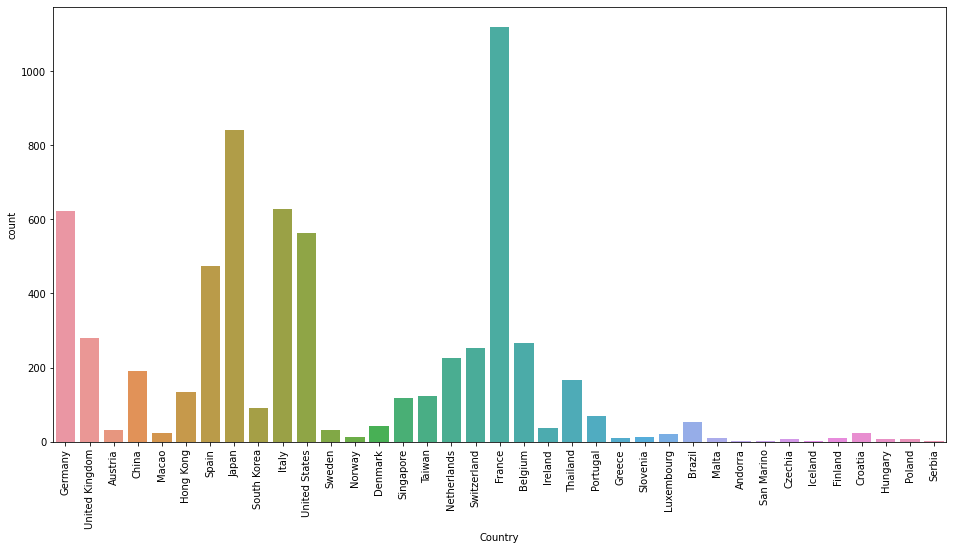

In [44]:
plt.figure(figsize=(16,8))
sns.set_palette("Paired")
sns.countplot(data = data, x = "Country")
plt.xticks(rotation = 90 )
plt.show()

## Award


- 1 MICHELIN Star: 요리가 훌륭한 식당
- 2 MICHELIN Stars: 요리가 훌륭하여 멀리 찾아갈 만한 식당
- 3 MICHELIN Stars: 요리가 매우 훌륭하여 맛을 보기 위해 특별한 여행을 떠날 가치가 있는 식당
- Bib Gourmand: 합리적인 가격에 훌륭한 음식을 선사하는 친근한 분위기의 레스토랑

In [22]:
data.groupby(['Country', 'Award']).size()

Country         Award           
Andorra         1 MICHELIN Star       1
                Bib Gourmand          1
Austria         1 MICHELIN Star      11
                2 MICHELIN Stars      6
                3 MICHELIN Stars      1
                                   ... 
United Kingdom  Bib Gourmand        103
United States   1 MICHELIN Star     149
                2 MICHELIN Stars     36
                3 MICHELIN Stars     13
                Bib Gourmand        366
Length: 117, dtype: int64

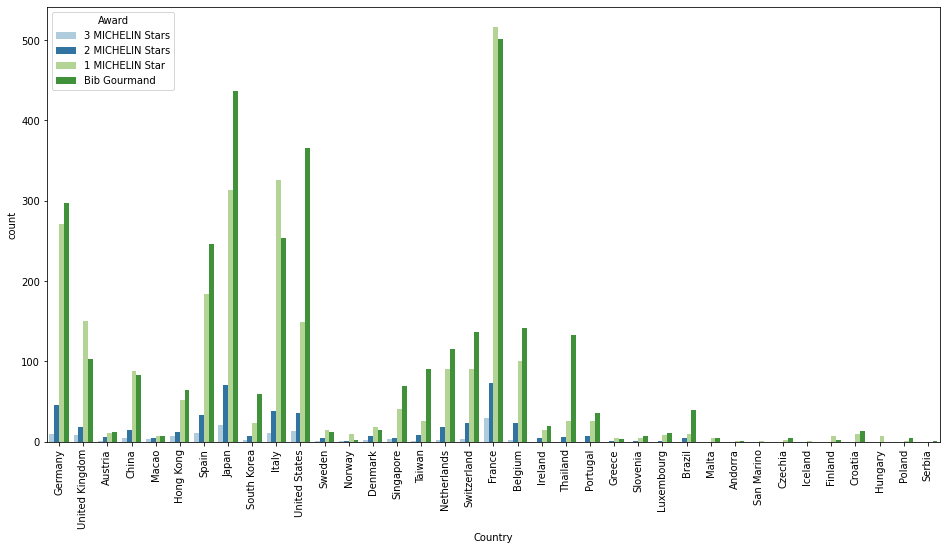

In [30]:
plt.figure(figsize=(16,8))
sns.set_palette("Paired")
sns.countplot(data = data, x = "Country", hue = "Award")
plt.xticks(rotation = 90 )
plt.show()

- 대부분 3 MICHELIN Stars와 Bib Gourmand임
- 1 MICHELIN Star와 2 MICHELIN Stars의 수는 비교적 적음

## Cuisine


Cuisine 종류 수 = 239개

In [20]:
cuisine = set([])
for i in data.Cuisine.unique():
  c = i.split(', ')
  for j in c:
    cuisine.add(j)

print(len(cuisine))
cuisine

239


{'Afghan',
 'Alpine',
 'Alsatian',
 'American',
 'American Contemporary',
 'Anago / Saltwater Eel',
 'Andalusian',
 'Apulian',
 'Asian',
 'Asian Contemporary',
 'Asian Influences',
 'Austrian',
 'Bakery',
 'Barbecue',
 'Basque',
 'Bavarian',
 'Beef Specialities',
 'Beijing Cuisine',
 'Belgian',
 'Brazilian',
 'Breton',
 'British Contemporary',
 'Bulgogi',
 'Burmese',
 'Calabrian',
 'Californian',
 'Cambodian',
 'Campanian',
 'Cantonese',
 'Cantonese Roast Meats',
 'Caribbean',
 'Castilian',
 'Catalan',
 'Central Asian',
 'Chankonabe',
 'Chao Zhou',
 'Chicken Specialities',
 'Chinese',
 'Chinese Contemporary',
 'Chiu Chow',
 'Chueotang',
 'Classic Cuisine',
 'Classic French',
 'Colombian',
 'Congee',
 'Contemporary',
 'Corsican',
 'Country cooking',
 'Crab Specialities',
 'Creative',
 'Creative British',
 'Creative French',
 'Creole',
 'Croatian',
 'Cuisine from Abruzzo',
 'Cuisine from Alentejo',
 'Cuisine from Aveyron',
 'Cuisine from Basilicata',
 'Cuisine from Franche-Comté',
 'Cuis